In [11]:
#adding the libraries

import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [5]:
# adding file

file_path = '/Users/mscorzoni/Downloads/PCA/blobs2.csv'
data = pd.read_csv(file_path)
data.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,-9.587828,-4.640974,-7.238876,-6.755609,-7.260508,-4.018110,-2.473796,-8.732220,2.967323,1.927218,...,-4.232223,4.621523,-7.881127,5.715173,-2.198992,-5.652042,2.294532,-11.305678,6.456732,-9.103836
1,4.430200,-7.408960,6.542226,-0.340267,-3.035140,-6.110085,5.947367,1.504693,0.159693,-10.043071,...,-1.490352,-1.379686,2.898314,-11.554418,3.995090,5.556163,-6.243226,-6.956367,-4.079177,-3.332520
2,1.687488,-4.747313,7.714434,0.466089,-1.147214,-3.827851,6.199882,-1.339071,2.281886,-10.378856,...,-1.600070,-2.524161,5.790805,-9.779573,3.976283,4.339449,-5.007315,-7.194471,-3.641903,-4.378965
3,0.580085,5.054813,1.156155,1.735212,0.433977,3.390672,-1.775347,7.299190,10.483092,-3.457759,...,-7.155131,-10.292705,6.859731,6.322292,7.500807,8.617424,4.512770,0.240015,6.106763,-7.057556
4,0.549273,-2.220818,10.625565,-7.102454,-5.502638,-7.016894,3.315088,-5.413384,-2.160280,-3.655956,...,-3.004390,5.946111,-7.085767,5.839948,-7.414791,9.395698,-2.193346,7.786570,0.974318,5.583822


In [9]:
# initialize PCA

pca = PCA()

In [10]:
# fit PCA to data

pca.fit(data)

PCA()

In [12]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)*100

In [13]:
# finding minimum number of components  needed to explain at least 75% of the variance

min_components = np.where(cumulative_variance >= 75)[0][0] # adding 1 because the indexing starts at 0

cumulative_variance, min_components

(array([ 22.168097  ,  41.11181404,  59.38668155,  75.83245901,
         90.35960522,  94.77620226,  97.26108541,  99.68747547,
         99.71165971,  99.73496323,  99.75788155,  99.77902802,
         99.79979684,  99.82000614,  99.83921994,  99.85787223,
         99.87630187,  99.89399016,  99.91086259,  99.92744743,
         99.94350623,  99.95855055,  99.97319068,  99.98686919,
        100.        ]),
 3)

In [15]:
# importing library

import matplotlib.pyplot as plt


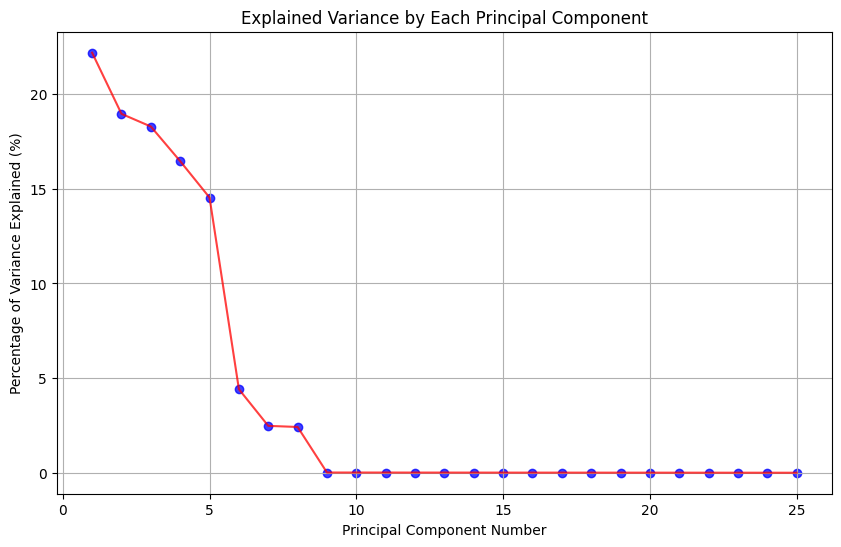

In [18]:
# Plotting the explained variance of each principal component using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 26), pca.explained_variance_ratio_ * 100, alpha=0.75, color='b')
plt.plot(range(1, 26), pca.explained_variance_ratio_ * 100, alpha=0.75, linestyle='-', color='r')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance Explained (%)')
plt.grid(True)
plt.show()

In [19]:
from scipy.stats import zscore

In [20]:
zscores = data.apply(zscore)

In [23]:
threshold = 2.8

outliers = (zscores.abs() > threshold).any(axis=1)

In [24]:
num_outliers = outliers.sum()
num_outliers

5

In [25]:
data_clean = data[~outliers]

In [26]:
data_clean.head()


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,-9.587828,-4.640974,-7.238876,-6.755609,-7.260508,-4.018110,-2.473796,-8.732220,2.967323,1.927218,...,-4.232223,4.621523,-7.881127,5.715173,-2.198992,-5.652042,2.294532,-11.305678,6.456732,-9.103836
1,4.430200,-7.408960,6.542226,-0.340267,-3.035140,-6.110085,5.947367,1.504693,0.159693,-10.043071,...,-1.490352,-1.379686,2.898314,-11.554418,3.995090,5.556163,-6.243226,-6.956367,-4.079177,-3.332520
2,1.687488,-4.747313,7.714434,0.466089,-1.147214,-3.827851,6.199882,-1.339071,2.281886,-10.378856,...,-1.600070,-2.524161,5.790805,-9.779573,3.976283,4.339449,-5.007315,-7.194471,-3.641903,-4.378965
3,0.580085,5.054813,1.156155,1.735212,0.433977,3.390672,-1.775347,7.299190,10.483092,-3.457759,...,-7.155131,-10.292705,6.859731,6.322292,7.500807,8.617424,4.512770,0.240015,6.106763,-7.057556
4,0.549273,-2.220818,10.625565,-7.102454,-5.502638,-7.016894,3.315088,-5.413384,-2.160280,-3.655956,...,-3.004390,5.946111,-7.085767,5.839948,-7.414791,9.395698,-2.193346,7.786570,0.974318,5.583822


In [27]:
pca = PCA(n_components=2)
pca.fit(data_clean)

PCA(n_components=2)

In [28]:
explained_variance = pca.explained_variance_ratio_.sum() * 100
explained_variance

75.26760714065045

In [30]:
import seaborn as sns


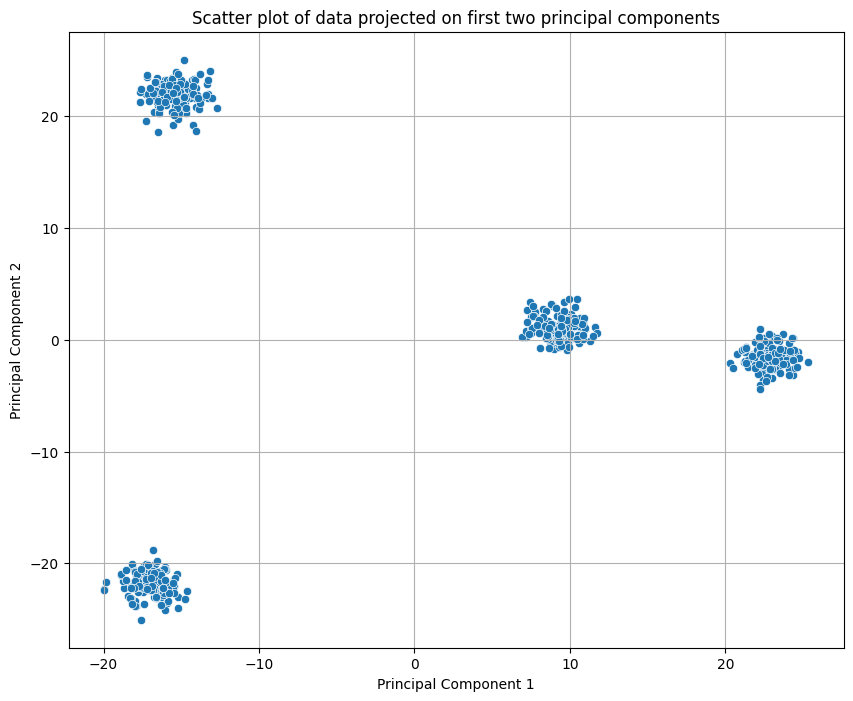

In [32]:


principal_components = pca.fit_transform(data_clean)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Plot the data points on the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pc_df)
plt.title('Scatter plot of data projected on first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()